<a href="https://colab.research.google.com/github/souvik25162/Time-Series-Analysis-and-forecasting/blob/master/Superstore_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1_XfuYWRIFt64SNV2vC7mhAkPiQhvnFXw'})
downloaded.GetContentFile('Sample - Superstore (2).xls')

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm

In [ ]:
df=pd.read_excel('Sample - Superstore (2).xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [ ]:
#PREPROCESSING
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
df.drop(cols, axis=1, inplace=True)
 

In [ ]:
df.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [ ]:
df=df.sort_values('Order Date')
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
print("start date is:",df['Order Date'].min())

start date is: 2014-01-03 00:00:00


In [ ]:
print("End date is:",df['Order Date'].max())

End date is: 2017-12-30 00:00:00


In [ ]:
#Make the date an index
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [ ]:
df.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536


In [ ]:
Y=df['Sales'].resample('M').mean()

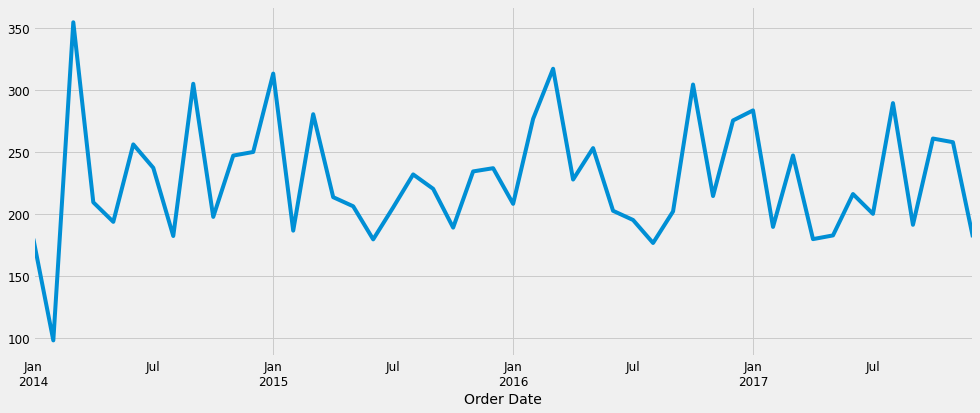

In [ ]:
Y.plot(figsize=(15, 6))
plt.show()

In [ ]:
ts=df.groupby(['Order Date'])['Sales'].mean()

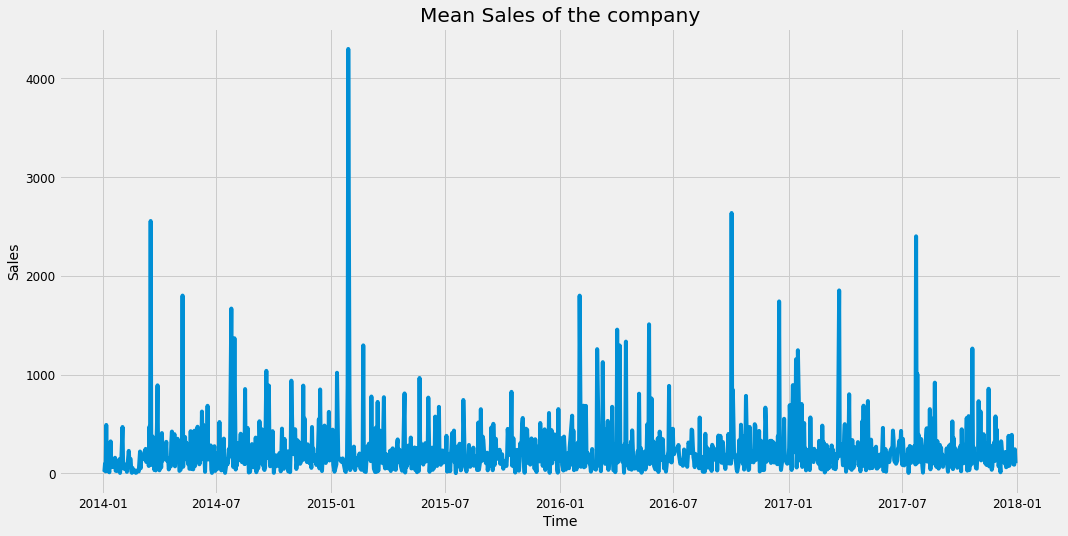

In [ ]:
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Mean Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)

In [ ]:
Y2=df['Sales'].resample('M').sum()

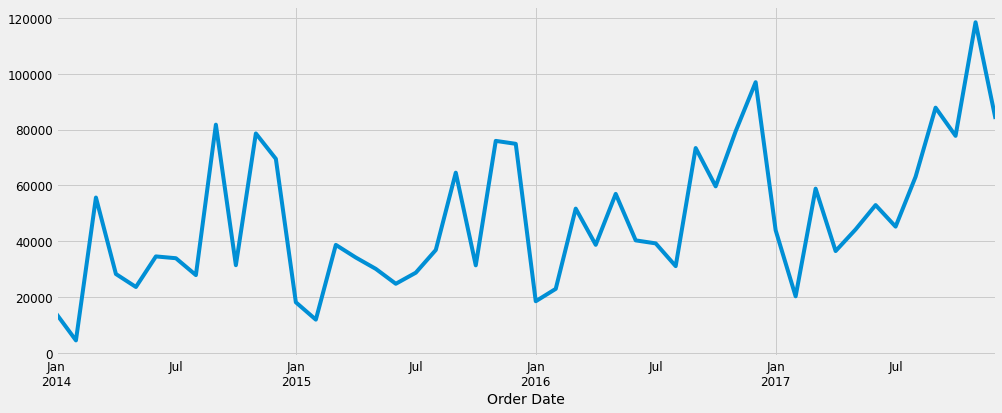

In [ ]:
Y2.plot(figsize=(15,6))
plt.show()

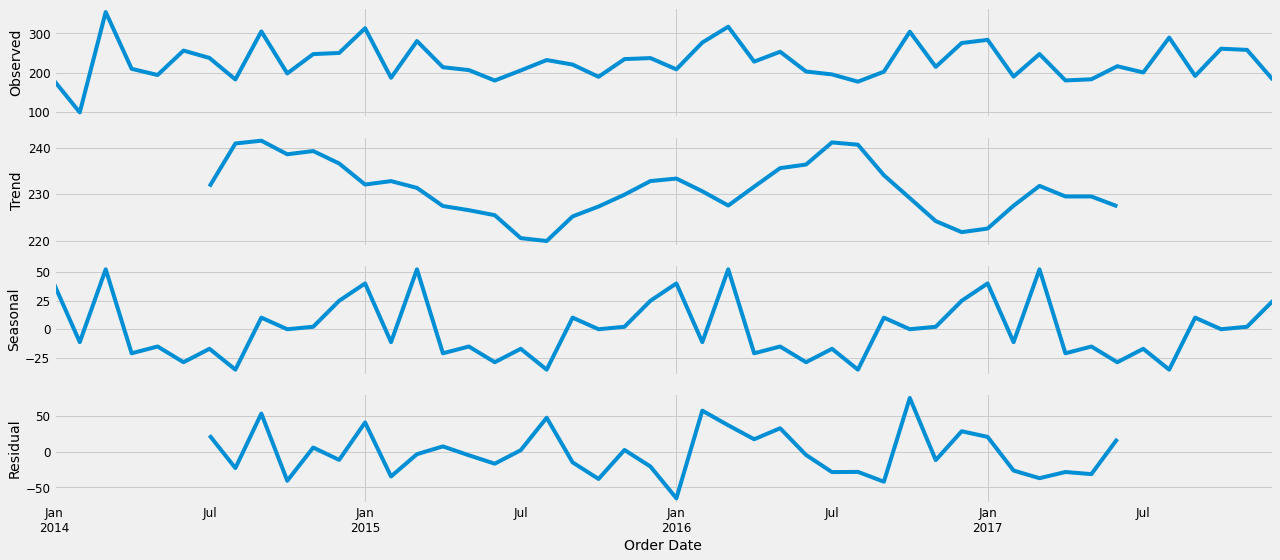

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(Y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
import itertools

In [ ]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)for x in list(itertools.product(p,d,q))]
print("Example of parameter combinations for Seasonal Arima")
print("Sarimax:{}X{}".format(pdq[1],seasonal_pdq[1]))
print("Sarimax:{}X{}".format(pdq[2],seasonal_pdq[2]))
print("Sarimax:{}X{}".format(pdq[3],seasonal_pdq[3]))
print("Sarimax:{}X{}".format(pdq[4],seasonal_pdq[4]))

Example of parameter combinations for Seasonal Arima
Sarimax:(0, 0, 1)X(0, 0, 1, 12)
Sarimax:(0, 1, 0)X(0, 1, 0, 12)
Sarimax:(0, 1, 1)X(0, 1, 1, 12)
Sarimax:(1, 0, 0)X(1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:648.1839075951442
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1573.9564723209578
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:387.257330070831
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:402.97856214610994
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:384.7995950669331
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:262.1644595966525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:597.654605697939
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:376.3251637580207
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:405.0472142226208
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:369.16844047362355
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:263.3626446818747
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:528.1869579691191
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1454.5916794067966
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:402.41176085757166
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:387.20858105018107
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1394.9326629156938
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:270.9438065103488
ARIMA(0, 1, 1)x(0, 

In [ ]:
mod = sm.tsa.statespace.SARIMAX(Y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0754      0.251     -0.300      0.764      -0.567       0.417
ma.L1         -1.0000   1665.246     -0.001      1.000   -3264.823    3262.823
ar.S.L12      -0.5256      0.180     -2.919      0.004      -0.878      -0.173
sigma2      2305.2202   3.84e+06      0.001      1.000   -7.52e+06    7.53e+06


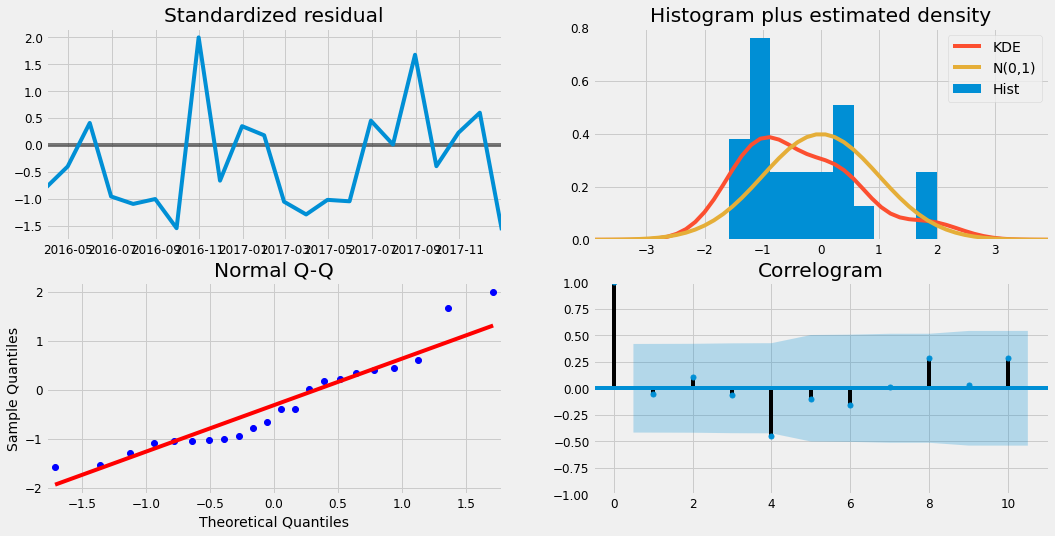

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
from datetime import datetime

In [ ]:
Y['2016':]

Order Date
2016-01-31    208.342596
2016-02-29    276.853193
2016-03-31    317.275307
2016-04-30    227.941406
2016-05-31    253.278791
2016-06-30    202.736352
2016-07-31    195.333149
2016-08-31    176.791899
2016-09-30    202.231474
2016-10-31    304.529311
2016-11-30    214.626935
2016-12-31    275.565463
2017-01-31    283.686284
2017-02-28    189.730219
2017-03-31    247.362827
2017-04-30    179.909045
2017-05-31    182.897150
2017-06-30    216.251942
2017-07-31    200.285027
2017-08-31    289.545358
2017-09-30    191.430614
2017-10-31    260.996387
2017-11-30    258.056264
2017-12-31    181.448742
Freq: M, Name: Sales, dtype: float64

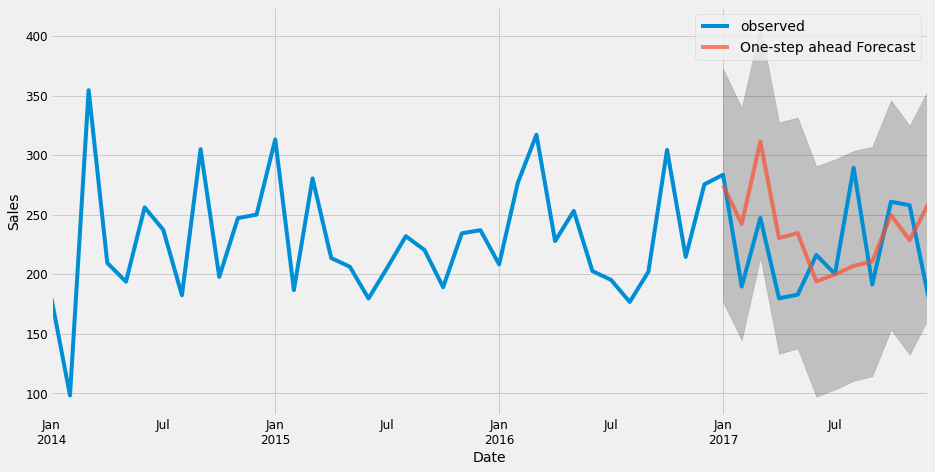

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = Y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = Y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2240.32


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 47.33
